In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plot
import statsmodels.formula.api as smf
df = pd.read_csv('https://raw.githubusercontent.com/mgenardi5/Data-Analytics---Capstone/main/livewell.csv')
#Import data set and packages

In [3]:
df.head()

,country_name,country_code,year,region_num_harmonized,region_name_harmonized,SurveyId,interview_year_mean,interview_month_mean,CMC_interview_mean,DM_age_15_19_p,...,EI_computer_p,EI_computer_p_se,DP_decide_no_contraception_p,DP_decide_no_contraception_p_se,EI_internet_day_p,EI_internet_day_p_se,EI_internet_week_p,EI_internet_week_p_se,EI_mobile_p,EI_mobile_p_se
0,Colombia,COL,1990,1,Atlantica,CO1990DHS,1990.0,7.0,1086.75,21.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Colombia,COL,1990,2,Oriental,CO1990DHS,1990.0,7.0,1086.93,22.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Colombia,COL,1990,3,Central,CO1990DHS,1990.0,7.0,1086.76,19.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Colombia,COL,1990,4,Pacifica,CO1990DHS,1990.0,7.0,1086.59,21.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Colombia,COL,1990,5,Bogota,CO1990DHS,1990.0,5.0,1085.41,19.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1 = df.drop(columns=['country_code','region_num_harmonized','SurveyId','interview_year_mean','interview_month_mean','CMC_interview_mean'])
df2 = pd.concat([df1.ffill(), df1.bfill()]).groupby(['country_name','year','region_name_harmonized']).mean()
#drop undescriptive columns and fill blanks with averages

In [5]:
df2

DM_age_15_19_p  DM_age_15_19_p_se  \
country_name year region_name_harmonized                                      
Armenia      2000 Aragatsotn                       19.01               1.58   
                  Ararat                           17.55               0.94   
                  Armavir                          16.97               1.02   
                  Gegharkunik                      19.43               2.03   
                  Kotayk                           19.33               2.69   
...                                                  ...                ...   
Zimbabwe     2015 Mashonaland West                 21.02               1.50   
                  Masvingo                         24.16               1.29   
                  Matabeleland North               23.37               1.90   
                  Matabeleland South               23.72               1.84   
                  Midlands                         23.90               1.53   

                                          DM_age_20_24_p  DM_age_20_24_p_se  \
country_name year region_name_harmonized                                      
Armenia      2000 Aragatsotn                       13.84               1.91   
                  Ararat                           17.55               1.42   
                  Armavir                          16.77               1.49   
                  Gegharkunik                      15.54               1.42   
                  Kotayk                           16.40               2.52   
...                                                  ...                ...   
Zimbabwe     2015 Mashonaland West                 15.91               1.31   
                  Masvingo                         14.16               1.13   
                  Matabeleland North               16.61               1.34   
                  Matabeleland South               23.10               1.57   
                  Midlands                         18.87               1.17   

                                          DM_age_25_29_p  DM_age_25_29_p_se  \
country_name year region_name_harmonized                                      
Armenia      2000 Aragatsotn                       11.98               1.53   
                  Ararat                           14.36               1.33   
                  Armavir                          12.53               1.91   
                  Gegharkunik                      12.68               2.08   
                  Kotayk                           10.34               1.49   
...                                                  ...                ...   
Zimbabwe     2015 Mashonaland West                 16.65               1.41   
                  Masvingo                         15.98               1.19   
                  Matabeleland North               15.37               1.38   
                  Matabeleland South               14.25               1.26   
                  Midlands                         15.80               0.96   

                                          DM_age_30_34_p  DM_age_30_34_p_se  \
country_name year region_name_harmonized                                      
Armenia      2000 Aragatsotn                       15.70               1.49   
                  Ararat                           13.48               1.27   
                  Armavir                          11.72               1.72   
                  Gegharkunik                      13.29               1.32   
                  Kotayk                           10.11               1.20   
...                                                  ...                ...   
Zimbabwe     2015 Mashonaland West                 16.47               1.55   
                  Masvingo                         16.82               1.21   
                  Matabeleland North               14.78               1.47   
                  Matabeleland South               13.60               1.37   
          

In [5]:
rows =[]
for column in df2:
    corr_matrix = np.corrcoef(df2['HL_IMR'], df2[column])
    corr = corr_matrix[0,1]
    r_sq = corr**2
    if r_sq >= 0.30:
        rows.append(
            {r_sq,
            column})
    else:
        rows.append(
            {'DROP',
            column})
df_coeff = pd.DataFrame(rows, columns = ['Coefficient_of_Determination','Field'])
df_coeff_1 = df_coeff.loc[(df_coeff['Coefficient_of_Determination'] != 'DROP')]
df_coeff_final = df_coeff_1.loc[(df_coeff_1['Field'] != 'DROP')]

df_coeff_final.sort_values(by=['Coefficient_of_Determination'], ascending = False)

#Correlation Coefficients for all fields in relation to Infant Mortality Rate
#Tells us which fields might have a strong correlation on mortality rate

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,Coefficient_of_Determination,Field
139,1,HL_IMR
145,0.873334,HL_U5MR
143,0.869889,HL_PNNMR
141,0.718034,HL_NNMR
137,0.579971,HL_CMR
102,0.460334,hdi
57,0.452987,EI_tv_p
85,0.441296,FF_GFR
59,0.433245,EI_women_elec_p
51,0.431671,EI_elec_p


In [6]:
df3 = df2.loc[:,['HL_IMR','hdi','EI_women_elec_p','EI_women_tv_p','RH_children_born_mean','FF_TFR','WL_wealth_mean','ER_elec_urban_p','ER_elec_rural_p','HH_women_toilet_low_p','RH_age_first_sex_mean','EI_women_fridge_p','DM_age_marr_mean']]
#cut down to fields of interest based on top r squared values

In [7]:
df4 = df3.rename(columns = {'HL_IMR':'Infant Mortality Rate','hdi':'Human Development Index','EI_women_elec_p':'% Women Electricity Access','EI_women_tv_p':'% Women with TV Access','RH_children_born_mean':'Avg. # of Children Ever Born','FF_TFR':'Total Fertility Rate','WL_wealth_mean':'Avg. of International Wealth Index','ER_elec_urban_p':'Urban Households with Electricity Access','ER_elec_rural_p':'Rural Households with Electricity Access','HH_women_toilet_low_p':'Women with Low Quality Toilet Access','RH_age_first_sex_mean':'Median Age of Women for First Birth','EI_women_fridge_p':'% Women with Fridge Access','DM_age_marr_mean':'Women Avg Age at Marriage'})
df4
#rename columns

Infant Mortality Rate  \
country_name year region_name_harmonized                          
Armenia      2000 Aragatsotn                              58.82   
                  Ararat                                  32.07   
                  Armavir                                 32.77   
                  Gegharkunik                             75.33   
                  Kotayk                                  41.79   
...                                                         ...   
Zimbabwe     2015 Mashonaland West                        56.33   
                  Masvingo                                43.43   
                  Matabeleland North                      44.25   
                  Matabeleland South                      29.62   
                  Midlands                                58.63   

                                          Human Development Index  \
country_name year region_name_harmonized                            
Armenia      2000 Aragatsotn                             0.644083   
                  Ararat                                 0.644127   
                  Armavir                                0.644415   
                  Gegharkunik                            0.643942   
                  Kotayk                                 0.644000   
...                                                           ...   
Zimbabwe     2015 Mashonaland West                       0.516788   
                  Masvingo                               0.515188   
                  Matabeleland North                     0.516823   
                  Matabeleland South                     0.516884   
                  Midlands                               0.516000   

                                          % Women Electricity Access  \
country_name year region_name_harmonized                               
Armenia      2000 Aragatsotn                                   99.79   
                  Ararat                                       99.64   
                  Armavir                                      99.39   
                  Gegharkunik                                  98.77   
                  Kotayk                                      100.00   
...                                                              ...   
Zimbabwe     2015 Mashonaland West                             31.74   
                  Masvingo                                     25.01   
                  Matabeleland North                           17.74   
                  Matabeleland South                           18.73   
                  Midlands                                     30.20   

                                          % Women with TV Access  \
country_name year region_name_harmonized                           
Armenia      2000 Aragatsotn                               85.80   
                  Ararat                                   95.37   
                  Armavir                                  90.00   
                  Gegharkunik                              88.52   
                  Kotayk                                   88.61   
...                                                          ...   
Zimbabwe     2015 Mashonaland West                         44.83   
                  Masvingo                                 30.94   
                  Matabeleland North                       24.17   
                  Matabeleland South                       26.22   
                  Midlands                                 39.05   

                                          Avg. # of Children Ever Born  \
country_name year region_name_harmonized                                 
Armenia      2000 Aragatsotn                                      1.95   
                  Ararat                                          1.90   
                  Armavir                                         1.87   
                  Gegharkunik                                     2.20   
      

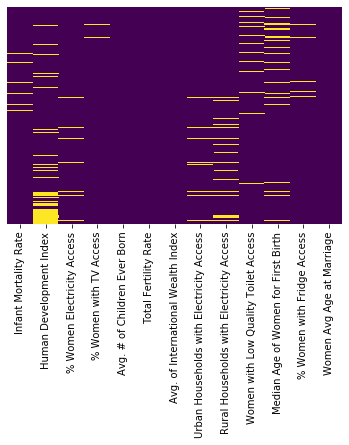

In [8]:
df_check = df.loc[:,['HL_IMR','hdi','EI_women_elec_p','EI_women_tv_p','RH_children_born_mean','FF_TFR','WL_wealth_mean','ER_elec_urban_p','ER_elec_rural_p','HH_women_toilet_low_p','RH_age_first_sex_mean','EI_women_fridge_p','DM_age_marr_mean']]
df_check = df_check.rename(columns = {'HL_IMR':'Infant Mortality Rate','hdi':'Human Development Index','EI_women_elec_p':'% Women Electricity Access','EI_women_tv_p':'% Women with TV Access','RH_children_born_mean':'Avg. # of Children Ever Born','FF_TFR':'Total Fertility Rate','WL_wealth_mean':'Avg. of International Wealth Index','ER_elec_urban_p':'Urban Households with Electricity Access','ER_elec_rural_p':'Rural Households with Electricity Access','HH_women_toilet_low_p':'Women with Low Quality Toilet Access','RH_age_first_sex_mean':'Median Age of Women for First Birth','EI_women_fridge_p':'% Women with Fridge Access','DM_age_marr_mean':'Women Avg Age at Marriage'})
sn.heatmap(df_check.isnull(), yticklabels=False, cbar=False, cmap='viridis')
#check roughly how many null values are being estimated for each of the chosen fields
#consider dropping HDI?

In [9]:
df_check.isna().sum()/df_check.count()
#% of values that are null

Infant Mortality Rate                       0.028181
Human Development Index                     0.202676
% Women Electricity Access                  0.032213
% Women with TV Access                      0.009866
Avg. # of Children Ever Born                0.006556
Total Fertility Rate                        0.000000
Avg. of International Wealth Index          0.000000
Urban Households with Electricity Access    0.035403
Rural Households with Electricity Access    0.075441
Women with Low Quality Toilet Access        0.068581
Median Age of Women for First Birth         0.140867
% Women with Fridge Access                  0.035694
Women Avg Age at Marriage                   0.001359
dtype: float64

In [10]:
df5 = df4.drop(['Human Development Index'], axis=1)
df5
#drop HDI given large percentage of values are estimated

Infant Mortality Rate  \
country_name year region_name_harmonized                          
Armenia      2000 Aragatsotn                              58.82   
                  Ararat                                  32.07   
                  Armavir                                 32.77   
                  Gegharkunik                             75.33   
                  Kotayk                                  41.79   
...                                                         ...   
Zimbabwe     2015 Mashonaland West                        56.33   
                  Masvingo                                43.43   
                  Matabeleland North                      44.25   
                  Matabeleland South                      29.62   
                  Midlands                                58.63   

                                          % Women Electricity Access  \
country_name year region_name_harmonized                               
Armenia      2000 Aragatsotn                                   99.79   
                  Ararat                                       99.64   
                  Armavir                                      99.39   
                  Gegharkunik                                  98.77   
                  Kotayk                                      100.00   
...                                                              ...   
Zimbabwe     2015 Mashonaland West                             31.74   
                  Masvingo                                     25.01   
                  Matabeleland North                           17.74   
                  Matabeleland South                           18.73   
                  Midlands                                     30.20   

                                          % Women with TV Access  \
country_name year region_name_harmonized                           
Armenia      2000 Aragatsotn                               85.80   
                  Ararat                                   95.37   
                  Armavir                                  90.00   
                  Gegharkunik                              88.52   
                  Kotayk                                   88.61   
...                                                          ...   
Zimbabwe     2015 Mashonaland West                         44.83   
                  Masvingo                                 30.94   
                  Matabeleland North                       24.17   
                  Matabeleland South                       26.22   
                  Midlands                                 39.05   

                                          Avg. # of Children Ever Born  \
country_name year region_name_harmonized                                 
Armenia      2000 Aragatsotn                                      1.95   
                  Ararat                                          1.90   
                  Armavir                                         1.87   
                  Gegharkunik                                     2.20   
                  Kotayk                                          1.70   
...                                                                ...   
Zimbabwe     2015 Mashonaland West                                2.43   
                  Masvingo                                        2.24   
                  Matabeleland North                              2.36   
                  Matabeleland South                              1.99   
                  Midlands                                        2.21   

                                          Total Fertility Rate  \
country_name year region_name_harmonized                         
Armenia      2000 Aragatsotn                             2.038   
                  Ararat                                 1.926   
                  Armavir                                1.706   
                  Gegharkunik                          

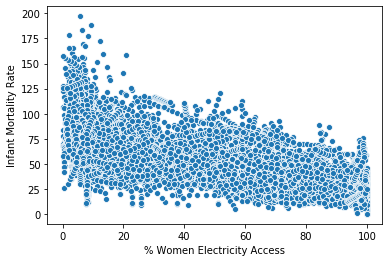

In [28]:
sn.scatterplot(data = df5, x = '% Women Electricity Access', y = 'Infant Mortality Rate')
#create scatterplots for each of the well correlated fields to IMR

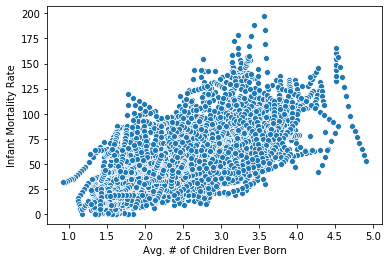

In [31]:
sn.scatterplot(data = df5, x = 'Avg. # of Children Ever Born', y = 'Infant Mortality Rate')

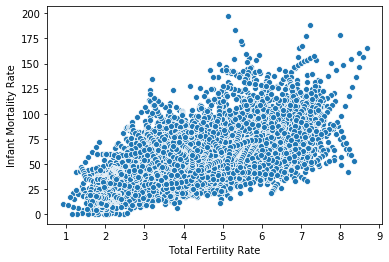

In [32]:
sn.scatterplot(data = df5, x = 'Total Fertility Rate', y = 'Infant Mortality Rate')

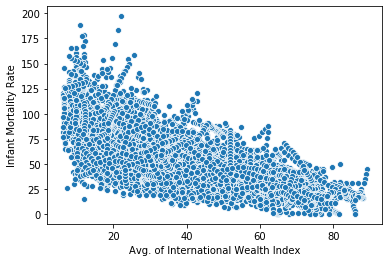

In [34]:
sn.scatterplot(data = df5, x = 'Avg. of International Wealth Index', y = 'Infant Mortality Rate')

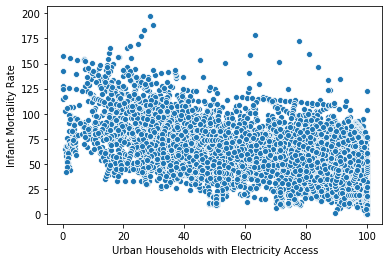

In [35]:
sn.scatterplot(data = df5, x = 'Urban Households with Electricity Access', y = 'Infant Mortality Rate')

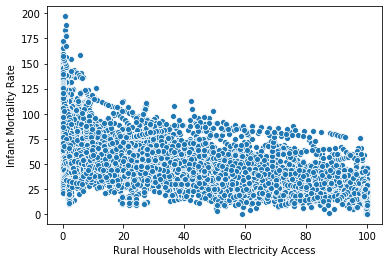

In [36]:
sn.scatterplot(data = df5, x = 'Rural Households with Electricity Access', y = 'Infant Mortality Rate')

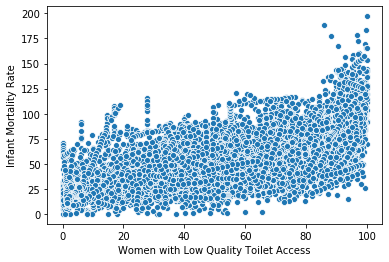

In [37]:
sn.scatterplot(data = df5, x = 'Women with Low Quality Toilet Access', y = 'Infant Mortality Rate')

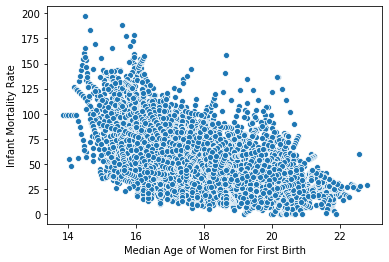

In [40]:
sn.scatterplot(data = df5, x = 'Median Age of Women for First Birth', y = 'Infant Mortality Rate')

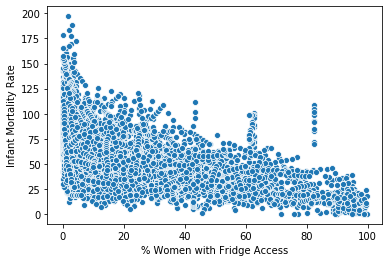

In [41]:
sn.scatterplot(data = df5, x = '% Women with Fridge Access', y = 'Infant Mortality Rate')

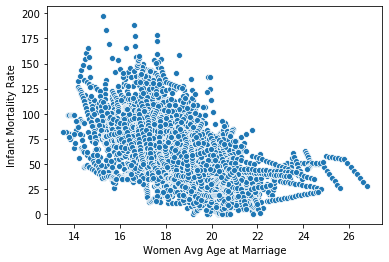

In [42]:
sn.scatterplot(data = df5, x = 'Women Avg Age at Marriage', y = 'Infant Mortality Rate')

In [12]:
df6 = df5.reset_index()
df6
#Ungroup to access prior grouped fields

,country_name,year,region_name_harmonized,Infant Mortality Rate,% Women Electricity Access,% Women with TV Access,Avg. # of Children Ever Born,Total Fertility Rate,Avg. of International Wealth Index,Urban Households with Electricity Access,Rural Households with Electricity Access,Women with Low Quality Toilet Access,Median Age of Women for First Birth,% Women with Fridge Access,Women Avg Age at Marriage
0,Armenia,2000,Aragatsotn,58.82,99.79,85.80,1.95,2.038,55.01,100.00,99.04,76.62,20.49,66.39,19.99
1,Armenia,2000,Ararat,32.07,99.64,95.37,1.90,1.926,65.42,100.00,99.03,70.59,19.32,86.81,19.23
2,Armenia,2000,Armavir,32.77,99.39,90.00,1.87,1.706,63.07,100.00,98.65,66.33,20.00,75.10,19.68
3,Armenia,2000,Gegharkunik,75.33,98.77,88.52,2.20,2.542,58.50,99.30,97.87,73.36,19.19,62.91,18.83
4,Armenia,2000,Kotayk,41.79,100.00,88.61,1.70,1.261,73.46,100.00,99.40,26.65,20.28,75.17,20.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7365,Zimbabwe,2015,Mashonaland West,56.33,31.74,44.83,2.43,4.300,33.08,71.58,11.31,39.34,18.19,26.49,18.35
7366,Zimbabwe,2015,Masvingo,43.43,25.01,30.94,2.24,4.446,28.06,90.77,13.19,47.63,18.65,22.56,19.47
7367,Zimbabwe,2015,Matabeleland North,44.25,17.74,24.17,2.36,4.360,23.22,90.64,8.21,61.41,17.46,14.45,19.37
7368,Zimbabwe,2015,Matabeleland South,29.62,18.73,26.22,1.99,3.546,29.24,73.96,6.48,39.44,17.69,16.58,19.97


In [52]:
df_country_check = df6.groupby(['country_name'])['Infant Mortality Rate'].mean()
df_country_check.sort_values(ascending = False)
#grab the top 5 and bottom 5 infant mortality rate countries

country_name
Mozambique                   91.614365
Niger                        90.863889
Sierra Leone                 88.133335
Mali                         87.110136
Malawi                       86.088333
Cote d'Ivoire                81.905000
Lesotho                      81.613455
Zambia                       77.759699
Madagascar                   76.549902
Congo Democratic Republic    76.207728
Burkina Faso                 73.387308
Nigeria                      72.612083
Guinea                       72.432857
Uganda                       70.132102
Tanzania                     68.009138
Benin                        67.481477
Pakistan                     67.175532
Nepal                        66.798727
Liberia                      66.241000
Ethiopia                     64.878048
Togo                         64.425833
Cambodia                     61.690315
Kenya                        60.564880
Haiti                        59.319020
Cameroon                     58.490000
Bangladesh  

In [71]:
df7 = df6.loc[(df6['country_name'] == 'Mozambique') | (df6['country_name'] == 'Niger') | (df6['country_name'] == 'Sierra Leone') | (df6['country_name'] == 'Mali')| (df6['country_name'] == 'Malawi')| (df6['country_name'] == 'Maldives')| (df6['country_name'] == 'Armenia')| (df6['country_name'] == 'Colombia')| (df6['country_name'] == 'Turkey')| (df6['country_name'] == 'Jordan')]
df7
#Filtered on subset of countries

,country_name,year,region_name_harmonized,Infant Mortality Rate,% Women Electricity Access,% Women with TV Access,Avg. # of Children Ever Born,Total Fertility Rate,Avg. of International Wealth Index,Urban Households with Electricity Access,Rural Households with Electricity Access,Women with Low Quality Toilet Access,Median Age of Women for First Birth,% Women with Fridge Access,Women Avg Age at Marriage
0,Armenia,2000,Aragatsotn,58.82,99.79,85.80,1.95,2.038,55.01,100.000,99.040,76.62,20.49,66.39,19.99
1,Armenia,2000,Ararat,32.07,99.64,95.37,1.90,1.926,65.42,100.000,99.030,70.59,19.32,86.81,19.23
2,Armenia,2000,Armavir,32.77,99.39,90.00,1.87,1.706,63.07,100.000,98.650,66.33,20.00,75.10,19.68
3,Armenia,2000,Gegharkunik,75.33,98.77,88.52,2.20,2.542,58.50,99.300,97.870,73.36,19.19,62.91,18.83
4,Armenia,2000,Kotayk,41.79,100.00,88.61,1.70,1.261,73.46,100.000,99.400,26.65,20.28,75.17,20.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6799,Turkey,2013,Central,17.78,73.45,97.75,1.50,1.851,78.39,50.265,24.085,2.14,18.65,99.74,20.02
6800,Turkey,2013,East,13.83,73.45,97.04,2.14,3.356,71.91,50.265,24.085,6.64,18.65,97.73,19.55
6801,Turkey,2013,North,8.95,73.45,97.19,1.56,2.015,73.98,50.265,24.085,3.58,18.65,99.57,21.05
6802,Turkey,2013,South,14.63,73.45,97.43,1.77,2.407,76.58,50.265,24.085,1.61,18.65,98.98,20.54


Text(0.5, 1.0, 'Infant Mortality by Year')

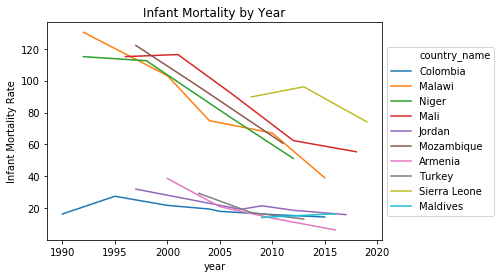

In [85]:
df8 = df7.groupby(['year', 'country_name'])['Infant Mortality Rate'].mean().reset_index()
year = df8['year']
rate = df8['Infant Mortality Rate']

ax = sn.lineplot(data=df8, x='year',y='Infant Mortality Rate',hue = 'country_name')
ax.legend(loc='center left', bbox_to_anchor=(1.0,0.5),ncol=1)
ax.set_title('Infant Mortality by Year')

In [36]:
df9 = df6.loc[(df6['country_name'] == 'Mozambique')| (df6['country_name'] == 'Niger') | (df6['country_name'] == 'Sierra Leone')| (df6['country_name'] == 'Mali')| (df6['country_name'] == 'Malawi')]
#subset data by countries with highest IMR

Text(0.5, 1.0, '% Women Electricity Access')

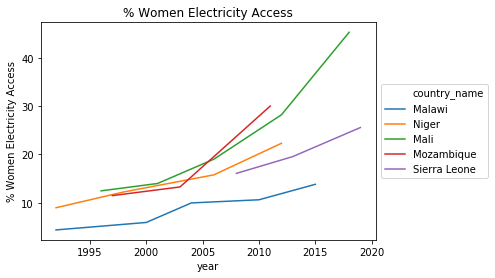

In [37]:
df10 = df9.groupby(['year','country_name'])['% Women Electricity Access'].mean().reset_index()
year = df10['year']
rate = df10['% Women Electricity Access']

ax = sn.lineplot(data=df10, x='year',y='% Women Electricity Access',hue = 'country_name')
ax.legend(loc='center left', bbox_to_anchor=(1.0,0.5),ncol=1)
ax.set_title('% Women Electricity Access')
#for a few of the well-correlated fields with IMR, show these by countries with highest IMR's

Text(0.5, 1.0, 'Women Avg Age at Marriage')

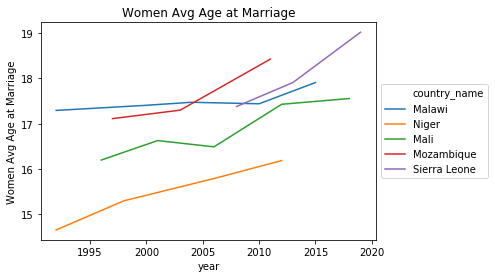

In [40]:
df10 = df9.groupby(['year','country_name'])['Women Avg Age at Marriage'].mean().reset_index()
year = df10['year']
rate = df10['Women Avg Age at Marriage']

ax = sn.lineplot(data=df10, x='year',y='Women Avg Age at Marriage',hue = 'country_name')
ax.legend(loc='center left', bbox_to_anchor=(1.0,0.5),ncol=1)
ax.set_title('Women Avg Age at Marriage')

Text(0.5, 1.0, 'Women with Low Quality Toilet Access')

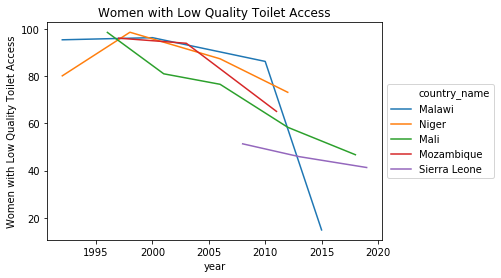

In [38]:
df10 = df9.groupby(['year','country_name'])['Women with Low Quality Toilet Access'].mean().reset_index()
year = df10['year']
rate = df10['Women with Low Quality Toilet Access']

ax = sn.lineplot(data=df10, x='year',y='Women with Low Quality Toilet Access',hue = 'country_name')
ax.legend(loc='center left', bbox_to_anchor=(1.0,0.5),ncol=1)
ax.set_title('Women with Low Quality Toilet Access')

Text(0.5, 1.0, 'Median Age of Women for First Birth')

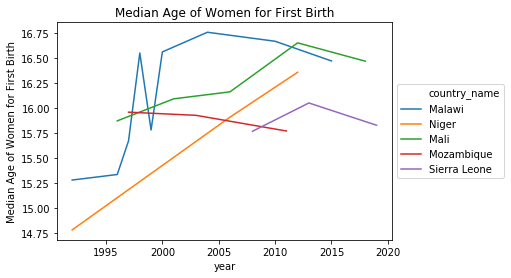

In [39]:
df10 = df9.groupby(['year','country_name'])['Median Age of Women for First Birth'].mean().reset_index()
year = df10['year']
rate = df10['Median Age of Women for First Birth']

ax = sn.lineplot(data=df10, x='year',y='Median Age of Women for First Birth',hue = 'country_name')
ax.legend(loc='center left', bbox_to_anchor=(1.0,0.5),ncol=1)
ax.set_title('Median Age of Women for First Birth')